In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#导入数据
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
features.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010/2/5,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,2,2010/2/5,40.19,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,0
2,3,2010/2/5,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,0
3,4,2010/2/5,43.76,2.598,NaN,NaN,NaN,NaN,NaN,126.442065,8.623,0
4,5,2010/2/5,39.70,2.572,NaN,NaN,NaN,NaN,NaN,211.653972,6.566,0
5,6,2010/2/5,40.43,2.572,NaN,NaN,NaN,NaN,NaN,212.622352,7.259,0
6,7,2010/2/5,10.53,2.580,NaN,NaN,NaN,NaN,NaN,189.381697,9.014,0
7,8,2010/2/5,34.14,2.572,NaN,NaN,NaN,NaN,NaN,214.471451,6.299,0
8,9,2010/2/5,38.01,2.572,NaN,NaN,NaN,NaN,NaN,214.655459,6.415,0
9,10,2010/2/5,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,0


In [2]:
feature_train = features[0:6435]
feature_test = features[6435:8191]

In [3]:
#数据合并
train = pd.merge(train, feature_train,how='outer', on=['Store','Date'])
test = pd.merge(test, feature_test,how='outer', on=['Store','Date'])

In [4]:
train = pd.merge(train, stores,how='outer', on='Store')
test = pd.merge(test, stores,how='outer', on='Store')

In [5]:
train = train[np.isnan(train['MarkDown1']) == False] #提取出2011年11月之后的数据

In [6]:
train['IsHoliday'].value_counts()

0    138739
1     11942
Name: IsHoliday, dtype: int64

In [7]:
train['Type'].value_counts()

A    76955
B    58727
C    14999
Name: Type, dtype: int64

In [8]:
#数字型编码
col_dict = {}
cols = ['Type']
col_dict ={'Type':{'A':1, 'B':2, 'C':3}}
for col in cols:
    train[col] = train[col].map(col_dict[col])
    test[col] = test[col].map(col_dict[col])

In [9]:
train['Type'].value_counts()

1    76955
2    58727
3    14999
Name: Type, dtype: int64

In [10]:
#查找train集中的缺失值
print (np.isnan(train['Weekly_Sales']).any())
print (np.isnan(train['IsHoliday']).any())
print (np.isnan(train['Temperature']).any())
print (np.isnan(train['Fuel_Price']).any())
print (np.isnan(train['MarkDown1']).any())
print (np.isnan(train['MarkDown2']).any())
print (np.isnan(train['MarkDown3']).any())
print (np.isnan(train['MarkDown4']).any())
print (np.isnan(train['MarkDown5']).any())
print (np.isnan(train['CPI']).any())
print (np.isnan(train['Unemployment']).any())

False
False
False
False
False
True
True
True
False
False
False


In [11]:
#填补train集中的缺失值
train = train.fillna({'MarkDown1':0})
train = train.fillna({'MarkDown2':0})
train = train.fillna({'MarkDown3':0})
train = train.fillna({'MarkDown4':0})
train = train.fillna({'MarkDown5':0})
train.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
6587,1,1,2011/11/11,18689.54,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,1,151315
6588,1,2,2011/11/11,44936.47,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,1,151315
6589,1,3,2011/11/11,9959.64,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,1,151315
6590,1,4,2011/11/11,36826.52,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,1,151315
6591,1,5,2011/11/11,31002.65,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,1,151315


In [12]:
#查找test集中的缺失值
print (np.isnan(test['IsHoliday']).any())
print (np.isnan(test['Temperature']).any())
print (np.isnan(test['Fuel_Price']).any())
print (np.isnan(test['MarkDown1']).any())
print (np.isnan(test['MarkDown2']).any())
print (np.isnan(test['MarkDown3']).any())
print (np.isnan(test['MarkDown4']).any())
print (np.isnan(test['MarkDown5']).any())
print (np.isnan(test['CPI']).any())
print (np.isnan(test['Unemployment']).any())

False
False
False
True
True
True
True
False
True
True


In [13]:
#填补test集中的缺失值
test = test.fillna({'MarkDown1':0})
test = test.fillna({'MarkDown2':0})
test = test.fillna({'MarkDown3':0})
test = test.fillna({'MarkDown4':0})
test = test.fillna({'MarkDown5':0})
test = test.fillna({'CPI':np.mean(test['CPI'])})
test = test.fillna({'Unemployment':np.mean(test['Unemployment'])})
test.head()

,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2012/11/2,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,0,1,151315
1,1,2,2012/11/2,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,0,1,151315
2,1,3,2012/11/2,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,0,1,151315
3,1,4,2012/11/2,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,0,1,151315
4,1,5,2012/11/2,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,0,1,151315


In [14]:
#删除变量Date“”
del train['Date']
del test['Date']

In [15]:
#合并变量“MarkDown1-5”
MarkDown_train = train['MarkDown1'] + train['MarkDown2'] + train['MarkDown3'] + train['MarkDown4'] + train['MarkDown5']
MarkDown_train = pd.DataFrame(MarkDown_train)
MarkDown_test = test['MarkDown1'] + test['MarkDown2'] + test['MarkDown3'] + test['MarkDown4'] + test['MarkDown5']
MarkDown_test = pd.DataFrame(MarkDown_test)

In [16]:
del train['MarkDown1']
del train['MarkDown2']
del train['MarkDown3']
del train['MarkDown4']
del train['MarkDown5']
train = pd.concat([train,MarkDown_train], axis=1)
train.columns = ['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','IsHoliday', 'Type', 'Size','MarkDown']

In [17]:
del test['MarkDown1']
del test['MarkDown2']
del test['MarkDown3']
del test['MarkDown4']
del test['MarkDown5']
test = pd.concat([test,MarkDown_test], axis=1)
test.columns = ['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','IsHoliday', 'Type', 'Size','MarkDown']

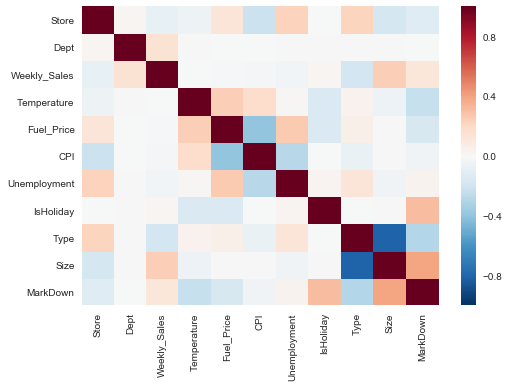

In [18]:
#计算各个变量之间的相关性系数
corr = train.corr()
sns.heatmap(corr.values, xticklabels=corr.index.tolist(), yticklabels=corr.index.tolist())
sns.plt.show()

In [19]:
corr

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,MarkDown
Store,1.000000,0.019704,-0.085891,-0.050517,0.125772,-0.214655,0.232034,-0.001087,0.223706,-0.178718,-0.120843
Dept,0.019704,1.000000,0.146673,0.001450,-0.000104,-0.006717,0.005512,0.001957,0.000845,0.000366,-0.000440
Weekly_Sales,-0.085891,0.146673,1.000000,-0.007381,-0.014529,-0.019760,-0.032092,0.017975,-0.182525,0.244095,0.124543
Temperature,-0.050517,0.001450,-0.007381,1.000000,0.244642,0.183971,0.015515,-0.148857,0.043746,-0.058994,-0.227904
Fuel_Price,0.125772,-0.000104,-0.014529,0.244642,1.000000,-0.395029,0.258124,-0.149458,0.054986,0.001283,-0.167631
CPI,-0.214655,-0.006717,-0.019760,0.183971,-0.395029,1.000000,-0.277885,-0.002953,-0.069686,0.000061,-0.043654
Unemployment,0.232034,0.005512,-0.032092,0.015515,0.258124,-0.277885,1.000000,0.028127,0.130349,-0.043075,0.038121
IsHoliday,-0.001087,0.001957,0.017975,-0.148857,-0.149458,-0.002953,0.028127,1.000000,-0.001471,0.000176,0.304910
Type,0.223706,0.000845,-0.182525,0.043746,0.054986,-0.069686,0.130349,-0.001471,1.000000,-0.812363,-0.295918
Size,-0.178718,0.000366,0.244095,-0.058994,0.001283,0.000061,-0.043075,0.000176,-0.812363,1.000000,0.391900


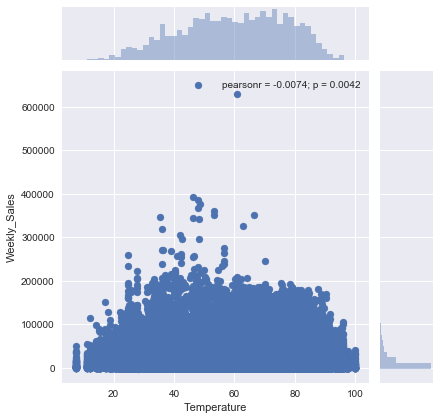

In [20]:
#画出温度与销售额的散点图
sns.jointplot(x='Temperature',y='Weekly_Sales',data=train)
sns.plt.show()

In [21]:
#删除变量“Temperature”
del train['Temperature']
del test['Temperature']

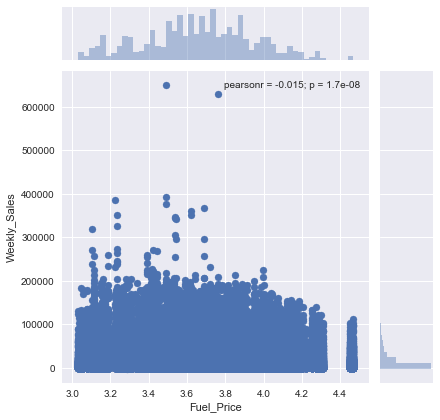

In [22]:
#画出变量油价与销售额之间的散点图
sns.jointplot(x='Fuel_Price',y='Weekly_Sales',data=train)
sns.plt.show()

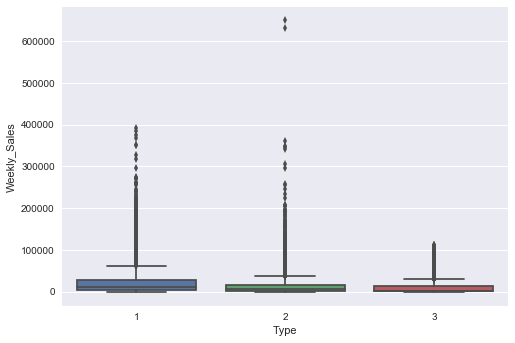

In [23]:
#画出变量商店类型与销售额之间的箱体图
sns.boxplot(x='Type',y='Weekly_Sales',data=train)
sns.plt.show()

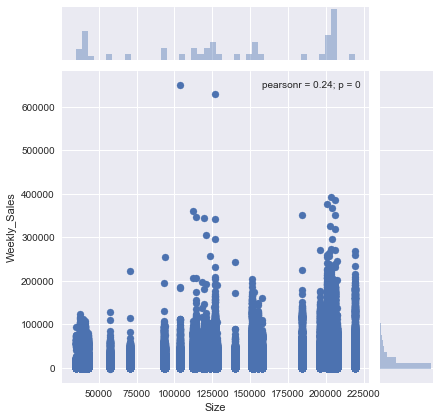

In [24]:
#画出变量商店规模与销售额之间的散点图
sns.jointplot(x='Size',y='Weekly_Sales',data=train)
sns.plt.show()

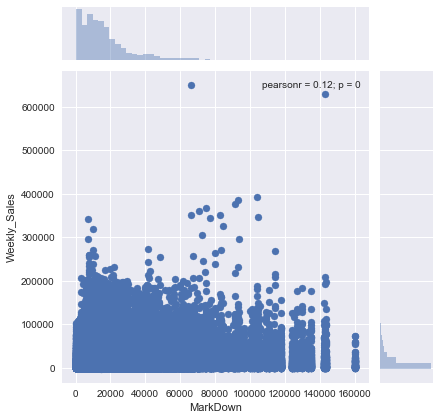

In [25]:
#画出变量降价与销售额之间的散点图
sns.jointplot(x='MarkDown',y='Weekly_Sales',data=train)
sns.plt.show()

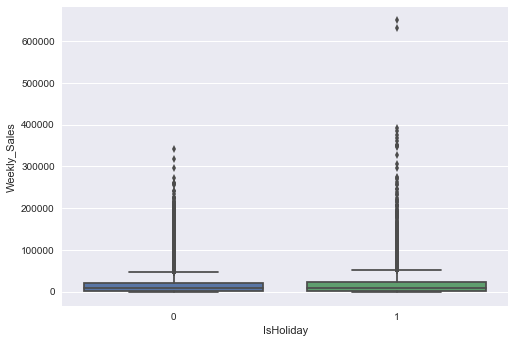

In [26]:
#画出变量节假日与销售额之间的箱体图
sns.boxplot(x='IsHoliday',y='Weekly_Sales',data=train)
sns.plt.show()

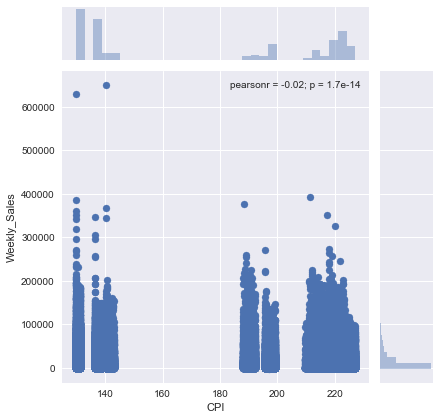

In [27]:
#画出变量CPI与销售额之间的散点图
sns.jointplot(x='CPI',y='Weekly_Sales',data=train)
sns.plt.show()

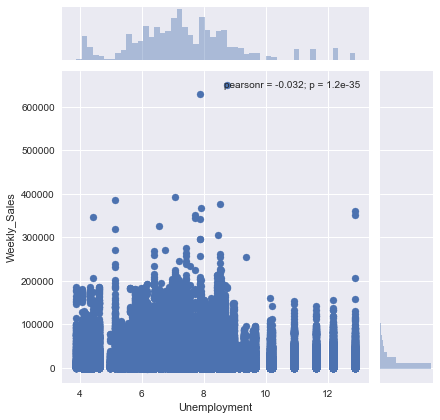

In [28]:
#换出变量失业率与销售额之间的散点图
sns.jointplot(x='Unemployment',y='Weekly_Sales',data=train)
sns.plt.show()

In [29]:
train.head(10)

,Store,Dept,Weekly_Sales,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,MarkDown
6587,1,1,18689.54,3.297,217.998085,7.866,0,1,151315,25671.68
6588,1,2,44936.47,3.297,217.998085,7.866,0,1,151315,25671.68
6589,1,3,9959.64,3.297,217.998085,7.866,0,1,151315,25671.68
6590,1,4,36826.52,3.297,217.998085,7.866,0,1,151315,25671.68
6591,1,5,31002.65,3.297,217.998085,7.866,0,1,151315,25671.68
6592,1,6,3527.62,3.297,217.998085,7.866,0,1,151315,25671.68
6593,1,7,25942.35,3.297,217.998085,7.866,0,1,151315,25671.68
6594,1,8,34003.52,3.297,217.998085,7.866,0,1,151315,25671.68
6595,1,9,37670.13,3.297,217.998085,7.866,0,1,151315,25671.68
6596,1,10,32346.54,3.297,217.998085,7.866,0,1,151315,25671.68


In [30]:
#将数据分为训练集和测试集
from sklearn import cross_validation
y = train['Weekly_Sales']
del train['Weekly_Sales']

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
#PCA降维
from sklearn.decomposition import PCA
pca = PCA(copy=True, n_components=4, whiten=False)
train_new = pca.fit_transform(train)
print ('所保留的n个主成分的方差贡献率：')
print (pca.explained_variance_ratio_)
print ('累计方差贡献率为：')
print (sum(pca.explained_variance_ratio_))

所保留的n个主成分的方差贡献率：
[  9.21883703e-01   7.81156326e-02   3.98648111e-07   2.29046007e-07]
累计方差贡献率为：
0.999999962843


In [32]:
X = train_new
sub_train, sub_test, sub_train_labels, sub_test_labels \
= cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [33]:
#线性回归模型
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(sub_train, sub_train_labels)
sub_test_pred = linear.predict(sub_test)
print ('Intercept:%.2f' % linear.intercept_)
print ('Coefficients:')
print (linear.coef_)
print ('Residual sum of squares: %.2f' % np.mean((linear.predict(sub_test)-sub_test_labels)**2))
print ('Variance score: %.2f' % linear.score(sub_test, sub_test_labels))

Intercept:16160.19
Coefficients:
[ -9.30505117e-02   2.54302323e-02  -1.09649050e+01   1.08825442e+02]
Residual sum of squares: 507845715.45
Variance score: 0.08


In [34]:
#LASSO回归
from sklearn import linear_model
lasso = linear_model.Lasso()
lasso.fit(sub_train, sub_train_labels)
print ('Intercept:%.2f' % lasso.intercept_)
print ('Coefficients:')
print (lasso.coef_)
print ('Residual sum of squares: %.2f' % np.mean((lasso.predict(sub_train)-sub_train_labels)**2))
print ('Variance score: %.2f' % lasso.score(sub_train, sub_train_labels))

Intercept:16160.19
Coefficients:
[ -9.30505124e-02   2.54302296e-02  -1.09642904e+01   1.08824373e+02]
Residual sum of squares: 489265893.10
Variance score: 0.08


In [35]:
#随机森林回归预测
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100)
model = forest.fit(sub_train, sub_train_labels)
print ('Residual sum of squares: %.2f' % np.mean((forest.predict(sub_test)-sub_test_labels)**2))
print ('Variance score: %.2f' % forest.score(sub_test, sub_test_labels))

Residual sum of squares: 69623546.29
Variance score: 0.87


In [36]:
#主成分降维
from sklearn.decomposition import PCA
pca = PCA(copy=True, n_components=4, whiten=False)
test_new = pca.fit_transform(test)
print ('所保留的n个主成分的方差贡献率：')
print (pca.explained_variance_ratio_)
print ('累计方差贡献率为：')
print (sum(pca.explained_variance_ratio_))

所保留的n个主成分的方差贡献率：
[  8.31169142e-01   1.68830374e-01   2.46717091e-07   2.03598163e-07]
累计方差贡献率为：
0.999999966616


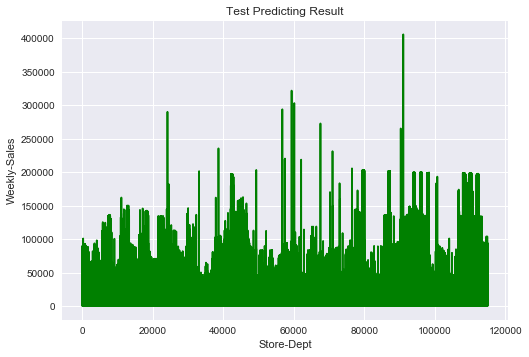

In [37]:
#随机森林预测test集
test_label3 = forest.predict(test_new)
test_label3 = pd.DataFrame(test_label3)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(test_label3, 'g-')
plt.title('Test Predicting Result')
plt.xlabel('Store-Dept')
plt.ylabel('Weekly-Sales')
sns.plt.show()